In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split as tts
import scipy.spatial.distance as dist_measure
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [16]:
raw_data= pd.read_csv("iris.csv",names=['sepal_length','sepal_width','petal_length','petal_width','labels'])
raw_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,labels
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [17]:
#encoding the the class labels
labelencoder= preprocessing.LabelEncoder()
raw_data['labels']= labelencoder.fit_transform(raw_data['labels'])
raw_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,labels
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [18]:
#splitting the data into training set and test set using stratify sampling
X_train, X_test, y_train, y_test = tts(raw_data, raw_data['labels'], test_size=0.2,stratify=raw_data['labels'])
print (X_train.shape, y_train.shape)

(120, 5) (120,)


In [33]:
# the function which returns the result of the predictions 
#parameters: train set, test set, type of distance used for measurement, k which the number of the nearest neighbors


def k_nearest_neighbor(train_set,test_set,dist_type,k,**kwargs): 
    p = kwargs.get('c', 0)
    #calculate the distance between the points for each instance in test to the points in the training set
    Y=dist_measure.cdist(X_train.iloc[:,:4], X_test.iloc[:,:4],dist_type,p) 
    #converting to dataframe with columns as the test data index and indices as train set index
    #each entry in the dataframe represents the distance between [train_set instance][test_set_instance].
    Y=pd.DataFrame(Y)
    #creating the dictionary with the predicted value.
    answer={}
    #looping through each of the column(test set index) and getting the k nearest indices of the training set
    # and gettting the class label from the train set and using mode to predict the encoded class label.
    for test_point in Y.columns:
        indices=Y[test_point].nsmallest(k).index.to_list()
        predicted_label=[train_set['labels'].iloc[x] for x in indices ]
        answer[test_point]=predicted_label
    return pd.DataFrame(answer).mode().dropna().T.rename(columns={0:"predicted_label_value"}).astype({"predicted_label_value": 'int32'})


def test_prediction_results(predicted_value, actual_value,encoder,k):
    predicted_value['Actual_label_value']=list(actual_value)
    predicted_value['predicted_label']=encoder.inverse_transform(predicted_value['predicted_label_value'])
    print(predicted_value)
    accuracy=accuracy_score(predicted_value['predicted_label_value'],predicted_value['Actual_label_value'] )
    print("Accuracy of this KNN classifer for k=%d is %f"%(k,accuracy))

def sklearn_knnClassifer(train,test,target,k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train,target)
    print(neigh.predict(test))

sklearn_knnClassifer(X_train,X_test,y_train,5)
sklearn_knnClassifer(X_train,X_test,y_train,20)

# predicted_labels=k_nearest_neighbor(X_train,X_test,'euclidean',3)
# test_prediction_results(predicted_labels,y_test,labelencoder,3)



[0 0 0 1 0 1 2 0 0 2 2 0 2 1 1 1 2 0 1 2 1 2 2 1 1 2 0 0 1 2]
[0 0 0 1 0 1 2 0 0 2 2 0 2 1 1 1 2 0 1 2 1 2 2 1 1 2 0 0 1 2]


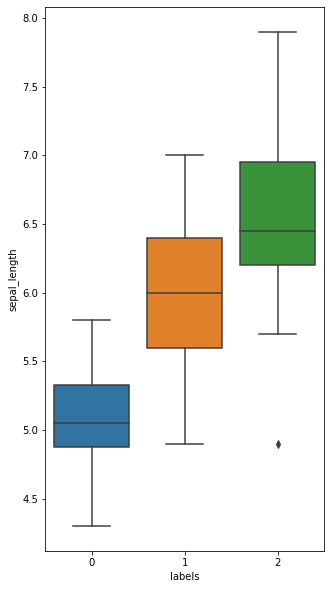

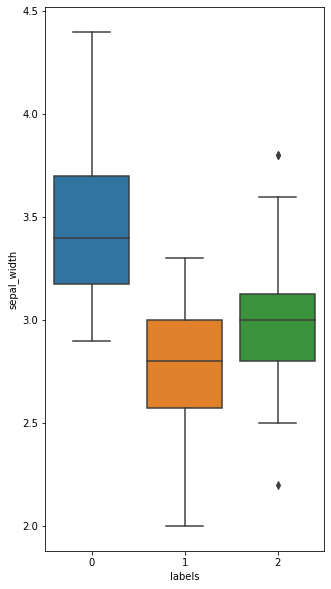

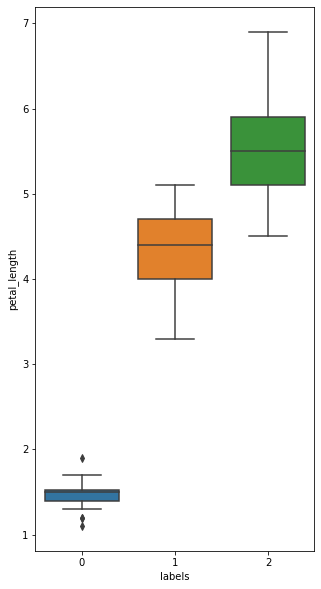

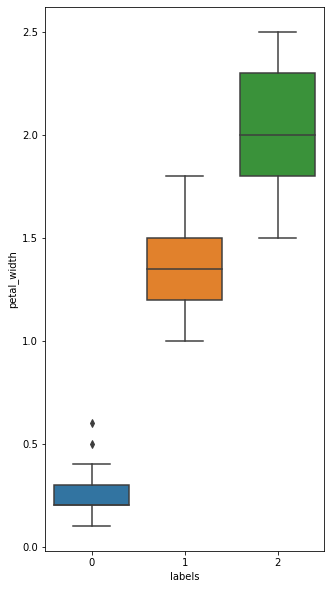

In [34]:
#Comparing the feature distribution using floowing function
def compare_features_by_class(X_train):
    for column in X_train.columns:
        if(column!='labels'):
            ax,fig=plt.subplots(figsize=(5,10))
            sns.boxplot(data=X_train, x='labels',y=column)
compare_features_by_class(X_train)


In [28]:
def plotly_compare_features_by_class(X_train):
    fig=go.Figure()
    for column in X_train.columns:
        if(column!='labels'):
            fig.add_trace(go.Box(x=X_train['labels'],y=X_train[column],name=column))
    fig.update_layout(boxmode='group')
    fig.show()
plotly_compare_features_by_class(X_train)

In [29]:
cmap_light = ListedColormap(['#FBBBB9', '#5EFB6E', '#82CAFF']) 
cmap_bold = ListedColormap(['#CA226B', '#387C44', '#2B65EC']) 
cmap_test = ListedColormap(['#8E35EF', '#FFFF00', '#659EC7'])
def decision_boundary_plot(train,target,test,test_target,k):
    train=train.iloc[:,:2]
    model = KNeighborsClassifier(k)
    model.fit(train,target)
    #meshstep size parameter
    h=0.2
    
    x_min,x_max=train.iloc[:,0].min()-1,train.iloc[:,0].max()+1
    y_min,y_max=train.iloc[:,1].min()-1,train.iloc[:,1].max()+1
    
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    
    Z=model.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.figure(figsize=(10,5))
    plt.title("3-Class classification for k= %s"%(k));
    plt.xlabel(train.columns[0])
    plt.ylabel(train.columns[1])
    plt.pcolormesh(xx,yy, Z, cmap=cmap_light)
    plt.scatter(train.iloc[:,0],train.iloc[:,1],c=target,cmap=cmap_bold,edgecolor='k',s=40)
    plt.scatter(test.iloc[:,0],test.iloc[:,1],c=test_target,cmap=cmap_test,linewidth=1, marker='X',s=100)
    plt.show()
    
    


    predicted_label_value  Actual_label_value  predicted_label
0                       0                   0      Iris-setosa
1                       0                   0      Iris-setosa
2                       0                   0      Iris-setosa
3                       1                   1  Iris-versicolor
4                       0                   0      Iris-setosa
5                       1                   1  Iris-versicolor
6                       2                   2   Iris-virginica
7                       0                   0      Iris-setosa
8                       0                   0      Iris-setosa
9                       1                   2  Iris-versicolor
10                      2                   2   Iris-virginica
11                      0                   0      Iris-setosa
12                      2                   2   Iris-virginica
13                      1                   1  Iris-versicolor
14                      1                   1  Iris-ver

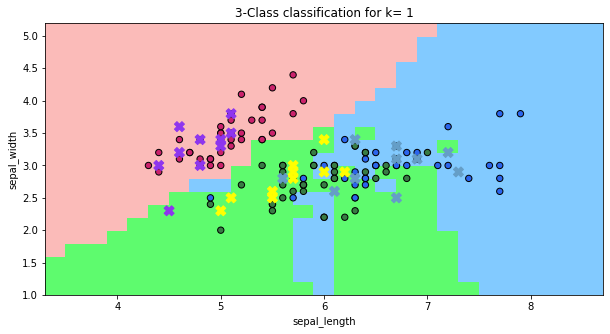

In [30]:
#b with k=1 plotting the decision boundaries
predicted_labels=k_nearest_neighbor(X_train,X_test,'euclidean',1)
test_prediction_results(predicted_labels,y_test,labelencoder,1)
decision_boundary_plot(X_train,y_train,X_test,y_test,1)


    predicted_label_value  Actual_label_value  predicted_label
0                       0                   0      Iris-setosa
1                       0                   0      Iris-setosa
2                       0                   0      Iris-setosa
3                       1                   1  Iris-versicolor
4                       0                   0      Iris-setosa
5                       1                   1  Iris-versicolor
6                       2                   2   Iris-virginica
7                       0                   0      Iris-setosa
8                       0                   0      Iris-setosa
9                       1                   2  Iris-versicolor
10                      2                   2   Iris-virginica
11                      0                   0      Iris-setosa
12                      1                   2  Iris-versicolor
13                      1                   1  Iris-versicolor
14                      1                   1  Iris-ver

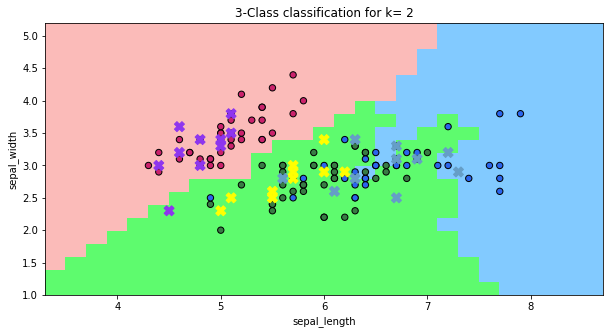

    predicted_label_value  Actual_label_value  predicted_label
0                       0                   0      Iris-setosa
1                       0                   0      Iris-setosa
2                       0                   0      Iris-setosa
3                       1                   1  Iris-versicolor
4                       0                   0      Iris-setosa
5                       1                   1  Iris-versicolor
6                       2                   2   Iris-virginica
7                       0                   0      Iris-setosa
8                       0                   0      Iris-setosa
9                       1                   2  Iris-versicolor
10                      2                   2   Iris-virginica
11                      0                   0      Iris-setosa
12                      2                   2   Iris-virginica
13                      1                   1  Iris-versicolor
14                      1                   1  Iris-ver

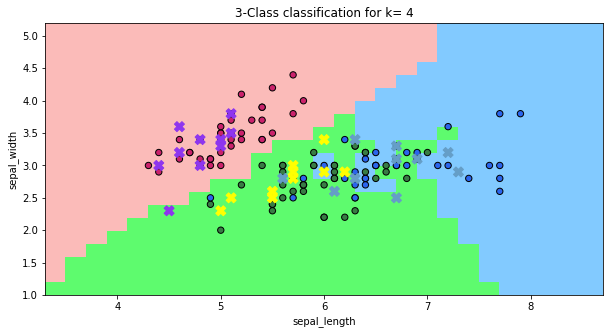

    predicted_label_value  Actual_label_value  predicted_label
0                       0                   0      Iris-setosa
1                       0                   0      Iris-setosa
2                       0                   0      Iris-setosa
3                       1                   1  Iris-versicolor
4                       0                   0      Iris-setosa
5                       1                   1  Iris-versicolor
6                       2                   2   Iris-virginica
7                       0                   0      Iris-setosa
8                       0                   0      Iris-setosa
9                       1                   2  Iris-versicolor
10                      2                   2   Iris-virginica
11                      0                   0      Iris-setosa
12                      2                   2   Iris-virginica
13                      1                   1  Iris-versicolor
14                      1                   1  Iris-ver

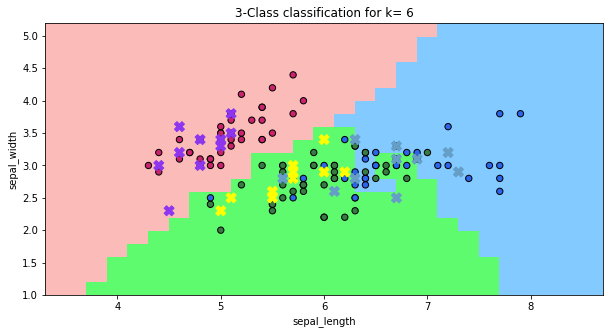

    predicted_label_value  Actual_label_value  predicted_label
0                       0                   0      Iris-setosa
1                       0                   0      Iris-setosa
2                       0                   0      Iris-setosa
3                       1                   1  Iris-versicolor
4                       0                   0      Iris-setosa
5                       1                   1  Iris-versicolor
6                       2                   2   Iris-virginica
7                       0                   0      Iris-setosa
8                       0                   0      Iris-setosa
9                       2                   2   Iris-virginica
10                      2                   2   Iris-virginica
11                      0                   0      Iris-setosa
12                      2                   2   Iris-virginica
13                      1                   1  Iris-versicolor
14                      1                   1  Iris-ver

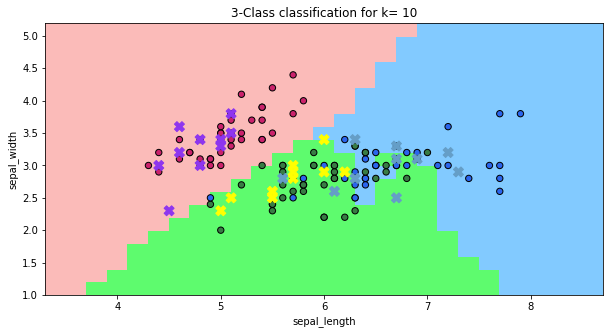

    predicted_label_value  Actual_label_value  predicted_label
0                       0                   0      Iris-setosa
1                       0                   0      Iris-setosa
2                       0                   0      Iris-setosa
3                       1                   1  Iris-versicolor
4                       0                   0      Iris-setosa
5                       1                   1  Iris-versicolor
6                       2                   2   Iris-virginica
7                       0                   0      Iris-setosa
8                       0                   0      Iris-setosa
9                       2                   2   Iris-virginica
10                      2                   2   Iris-virginica
11                      0                   0      Iris-setosa
12                      2                   2   Iris-virginica
13                      1                   1  Iris-versicolor
14                      1                   1  Iris-ver

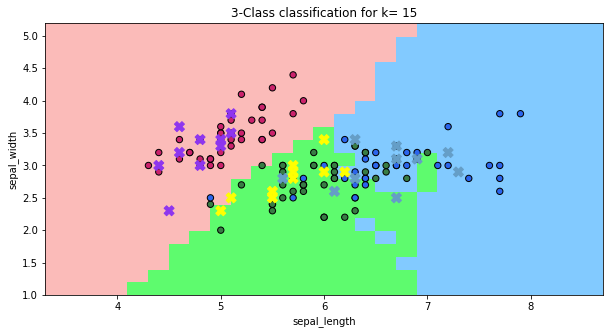

In [31]:
# for different value of k plotting the boundary and predicting the class label.
predicted_labels=k_nearest_neighbor(X_train,X_test,'euclidean',2)
test_prediction_results(predicted_labels,y_test,labelencoder,2)
decision_boundary_plot(X_train,y_train,X_test,y_test,2)


predicted_labels=k_nearest_neighbor(X_train,X_test,'euclidean',4)
test_prediction_results(predicted_labels,y_test,labelencoder,4)
decision_boundary_plot(X_train,y_train,X_test,y_test,4)



predicted_labels=k_nearest_neighbor(X_train,X_test,'euclidean',6)
test_prediction_results(predicted_labels,y_test,labelencoder,6)
decision_boundary_plot(X_train,y_train,X_test,y_test,6)



predicted_labels=k_nearest_neighbor(X_train,X_test,'euclidean',10)
test_prediction_results(predicted_labels,y_test,labelencoder,10)
decision_boundary_plot(X_train,y_train,X_test,y_test,10)



predicted_labels=k_nearest_neighbor(X_train,X_test,'euclidean',15)
test_prediction_results(predicted_labels,y_test,labelencoder,15)
decision_boundary_plot(X_train,y_train,X_test,y_test,15)







## Insights from the decision boundary plot with different values of K
1. when the k value is small the boundries are not smooth and the accuracy is less compared to a the a higher value of K.
2. and when value is very large then the boundries does get smooth but also opens up pockets.

    predicted_label_value  Actual_label_value predicted_label
0                       2                   0  Iris-virginica
1                       2                   0  Iris-virginica
2                       2                   0  Iris-virginica
3                       2                   1  Iris-virginica
4                       2                   0  Iris-virginica
5                       2                   1  Iris-virginica
6                       2                   2  Iris-virginica
7                       2                   0  Iris-virginica
8                       2                   0  Iris-virginica
9                       2                   2  Iris-virginica
10                      2                   2  Iris-virginica
11                      2                   0  Iris-virginica
12                      2                   2  Iris-virginica
13                      2                   1  Iris-virginica
14                      2                   1  Iris-virginica
15      

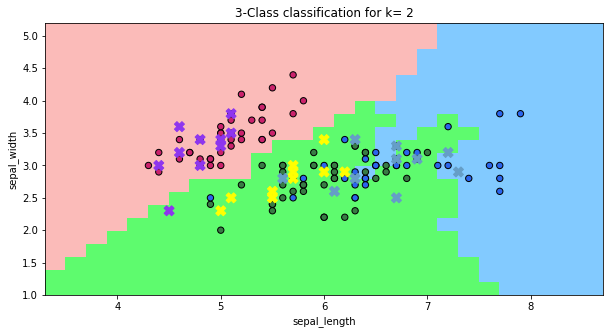

    predicted_label_value  Actual_label_value predicted_label
0                       2                   0  Iris-virginica
1                       2                   0  Iris-virginica
2                       2                   0  Iris-virginica
3                       2                   1  Iris-virginica
4                       2                   0  Iris-virginica
5                       2                   1  Iris-virginica
6                       2                   2  Iris-virginica
7                       2                   0  Iris-virginica
8                       2                   0  Iris-virginica
9                       2                   2  Iris-virginica
10                      2                   2  Iris-virginica
11                      2                   0  Iris-virginica
12                      2                   2  Iris-virginica
13                      2                   1  Iris-virginica
14                      2                   1  Iris-virginica
15      

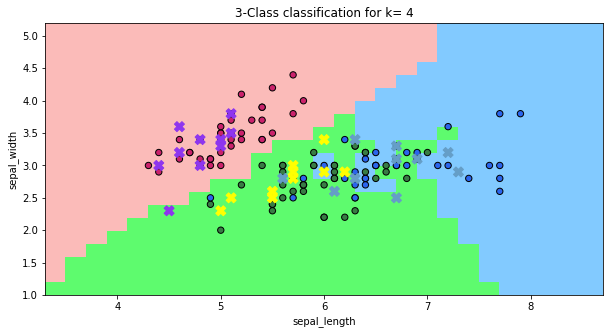

    predicted_label_value  Actual_label_value predicted_label
0                       2                   0  Iris-virginica
1                       2                   0  Iris-virginica
2                       2                   0  Iris-virginica
3                       2                   1  Iris-virginica
4                       2                   0  Iris-virginica
5                       2                   1  Iris-virginica
6                       2                   2  Iris-virginica
7                       2                   0  Iris-virginica
8                       2                   0  Iris-virginica
9                       2                   2  Iris-virginica
10                      2                   2  Iris-virginica
11                      2                   0  Iris-virginica
12                      2                   2  Iris-virginica
13                      2                   1  Iris-virginica
14                      2                   1  Iris-virginica
15      

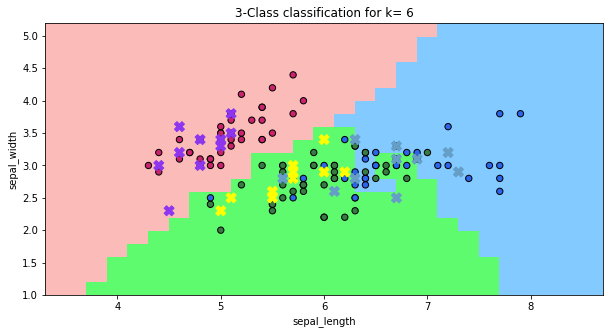

    predicted_label_value  Actual_label_value predicted_label
0                       2                   0  Iris-virginica
1                       2                   0  Iris-virginica
2                       2                   0  Iris-virginica
3                       2                   1  Iris-virginica
4                       2                   0  Iris-virginica
5                       2                   1  Iris-virginica
6                       2                   2  Iris-virginica
7                       2                   0  Iris-virginica
8                       2                   0  Iris-virginica
9                       2                   2  Iris-virginica
10                      2                   2  Iris-virginica
11                      2                   0  Iris-virginica
12                      2                   2  Iris-virginica
13                      2                   1  Iris-virginica
14                      2                   1  Iris-virginica
15      

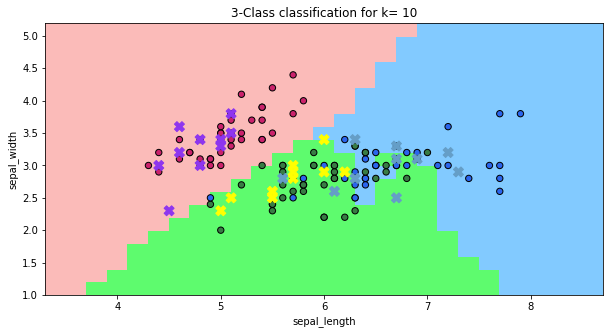

    predicted_label_value  1  Actual_label_value predicted_label
0                       0  2                   0     Iris-setosa
1                       0  2                   0     Iris-setosa
2                       0  2                   0     Iris-setosa
3                       0  2                   1     Iris-setosa
4                       0  2                   0     Iris-setosa
5                       0  2                   1     Iris-setosa
6                       0  2                   2     Iris-setosa
7                       0  2                   0     Iris-setosa
8                       0  2                   0     Iris-setosa
9                       0  2                   2     Iris-setosa
10                      0  2                   2     Iris-setosa
11                      0  2                   0     Iris-setosa
12                      0  2                   2     Iris-setosa
13                      0  2                   1     Iris-setosa
14                      0

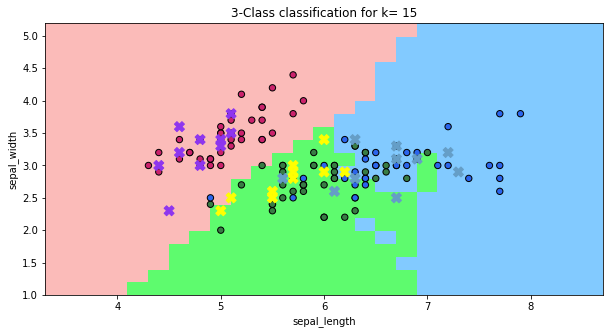

In [35]:
# for different value of k plotting the boundary and predicting the class label.
predicted_labels=k_nearest_neighbor(X_train,X_test,'minkowski',2,p=3)
test_prediction_results(predicted_labels,y_test,labelencoder,2)
decision_boundary_plot(X_train,y_train,X_test,y_test,2)


predicted_labels=k_nearest_neighbor(X_train,X_test,'minkowski',4,p=3)
test_prediction_results(predicted_labels,y_test,labelencoder,4)
decision_boundary_plot(X_train,y_train,X_test,y_test,4)



predicted_labels=k_nearest_neighbor(X_train,X_test,'minkowski',6,p=3)
test_prediction_results(predicted_labels,y_test,labelencoder,6)
decision_boundary_plot(X_train,y_train,X_test,y_test,6)



predicted_labels=k_nearest_neighbor(X_train,X_test,'minkowski',10,p=3)
test_prediction_results(predicted_labels,y_test,labelencoder,10)
decision_boundary_plot(X_train,y_train,X_test,y_test,10)



predicted_labels=k_nearest_neighbor(X_train,X_test,'minkowski',15,p=3)
test_prediction_results(predicted_labels,y_test,labelencoder,15)
decision_boundary_plot(X_train,y_train,X_test,y_test,15)